Importing necessary libraries

In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

First lets look at the data
Let's load the dataset and view the first few rows.  
This helps us understand the structure and types of data present.


In [4]:
df=pd.read_csv('Hotel Reservations (1).csv')

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Now let us understand the Data Structure
How many rows & columns are there?
What are the data types of each column?
Are there any categorical or numerical features?

In [6]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()

Dataset contains 36275 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         

We'll check if any column has missing data and decide how to handle it.

In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


Let's check if duplicates exist and remove them if necessary.

In [8]:
duplicate_rows = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows}")

Total Duplicate Rows: 0


To understand numerical features, let's check:  
Mean, Median, Min, Max values  
Standard Deviation (spread of data)  
Outliers (extreme values)

In [9]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Univariate analysis helps us understand individual feature distributions.  
For numerical columns, we'll check histograms to see value distributions.

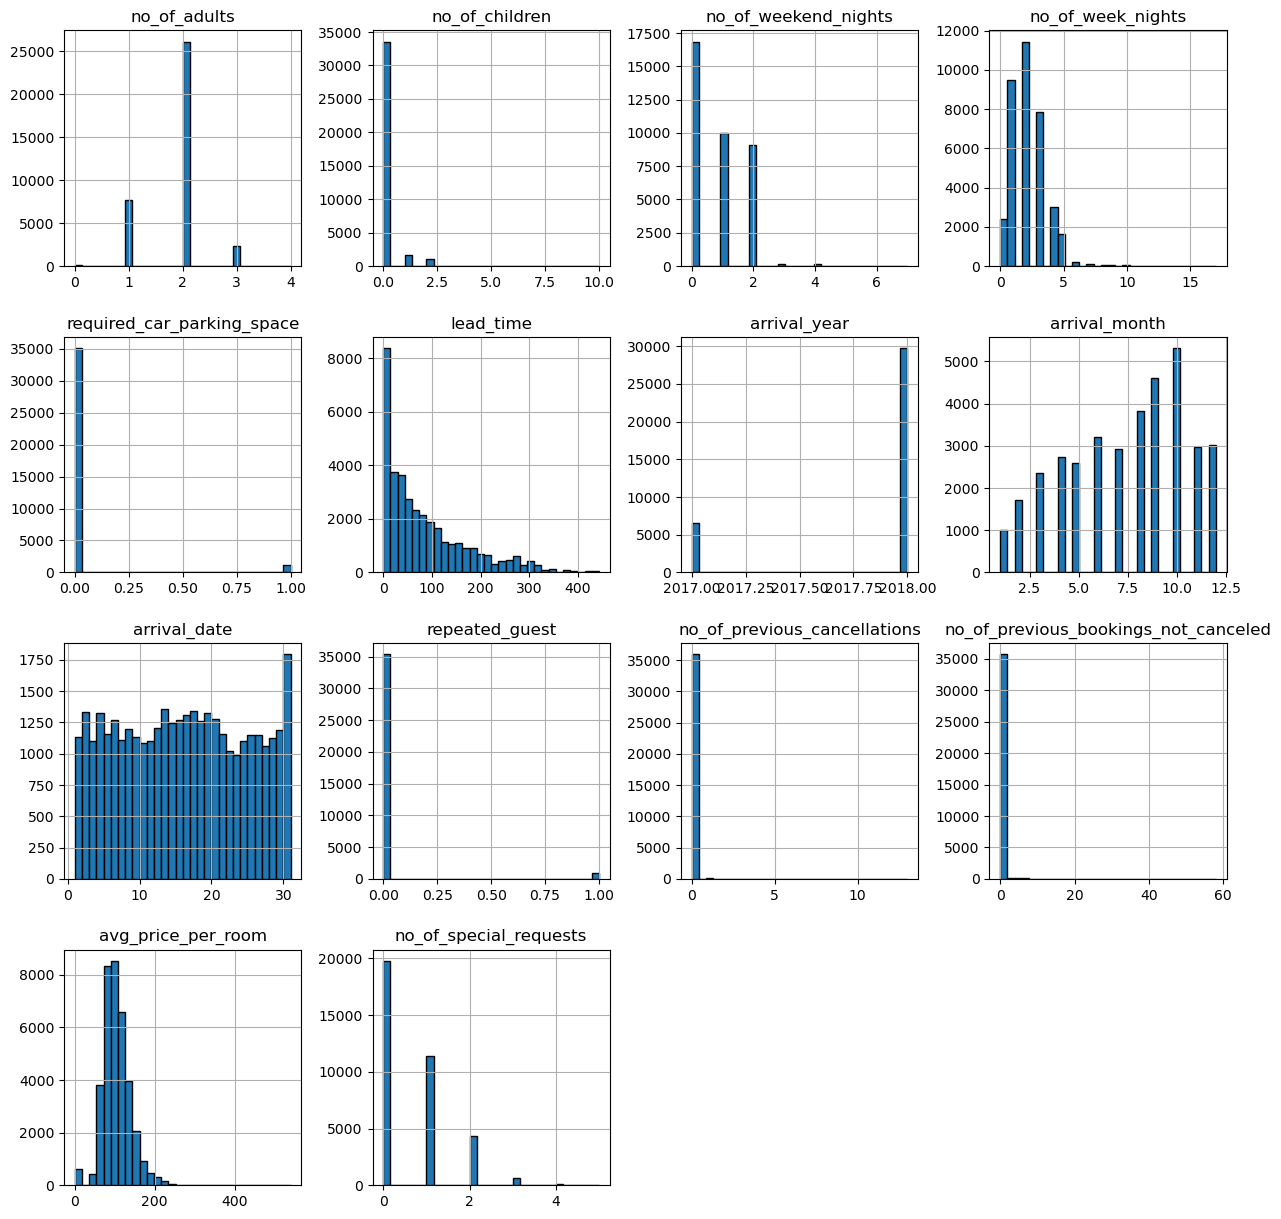

In [10]:
df.hist(figsize=(15, 15), bins=30, edgecolor="black")
plt.show()

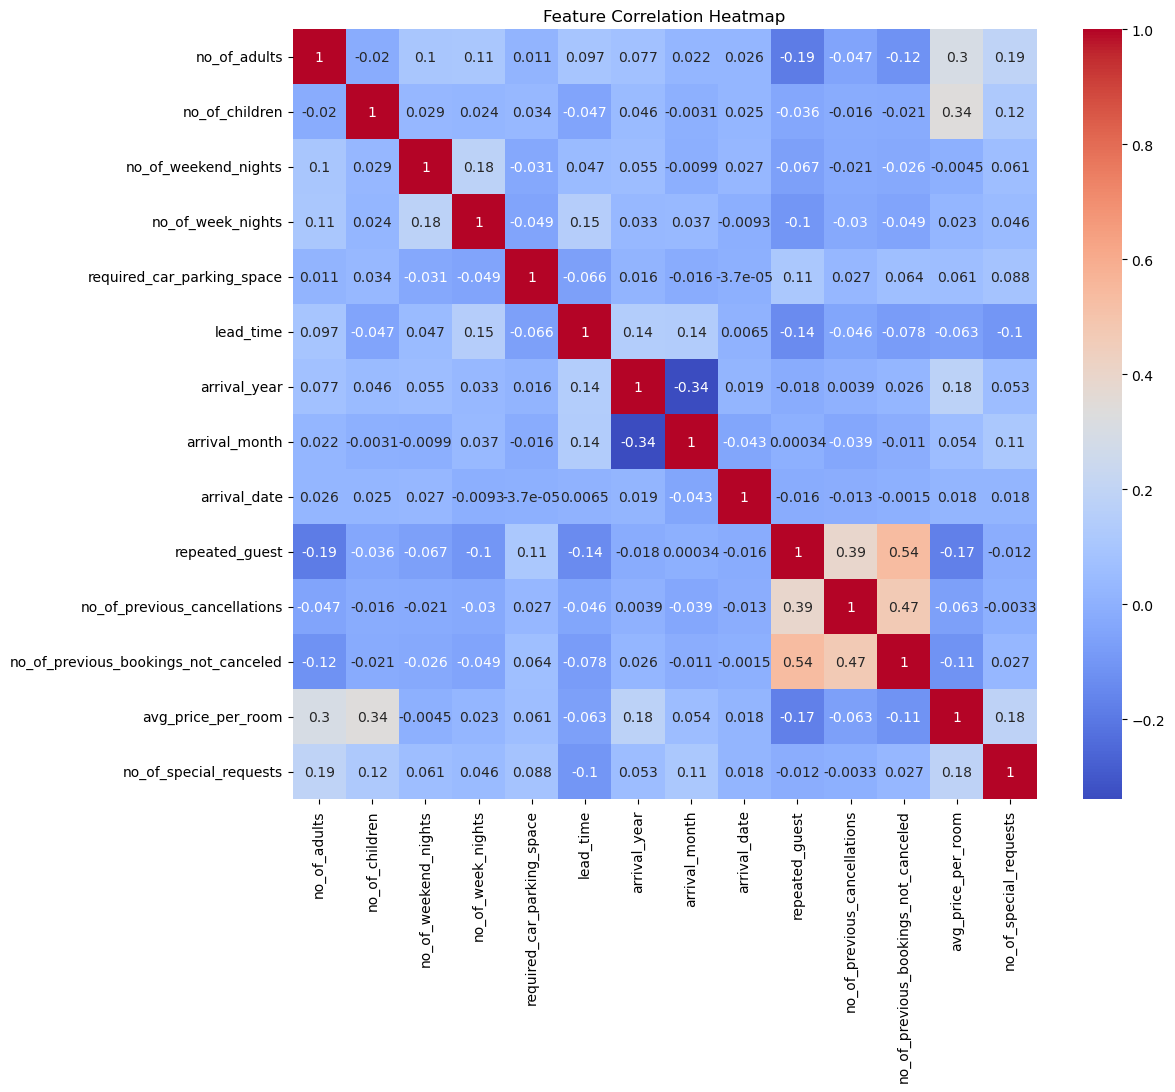

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'booking_status' in categorical_cols:
    categorical_cols.remove('booking_status')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [14]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [17]:
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Model:
Accuracy: 0.8035837353549277
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      2416
           1       0.83      0.90      0.86      4839

    accuracy                           0.80      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255

Confusion Matrix:
 [[1497  919]
 [ 506 4333]]


In [18]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [19]:
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model:
Accuracy: 0.8923501033769814
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2416
           1       0.89      0.96      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.89      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255

Confusion Matrix:
 [[1850  566]
 [ 215 4624]]


In [ ]:
svc_clf = SVC(kernel="linear", probability=True)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

In [ ]:
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))